In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [214]:
# read in data
rus = pd.read_csv('datasets/russell.csv')

In [215]:
rus['today'] = rus['Russell'] - rus['Russell'].mean()
rus['yest'] = rus['today'].shift(periods = -1)
rus['change'] = rus.today - rus.yest
rus['half_yest'] = rus.yest * .5
rus.Date = pd.to_datetime(rus.Date)
rus.head()

,Date,Russell,today,yest,change,half_yest
0,2009-01-02,505.839996,-358.203156,-359.013153,0.809997,-179.506576
1,2009-01-05,505.029999,-359.013153,-349.333130,-9.680023,-174.666565
2,2009-01-06,514.710022,-349.333130,-366.943146,17.610016,-183.471573
3,2009-01-07,497.100006,-366.943146,-362.033142,-4.910004,-181.016571
4,2009-01-08,502.010010,-362.033142,-382.743164,20.710022,-191.371582


## Question 1, Part A

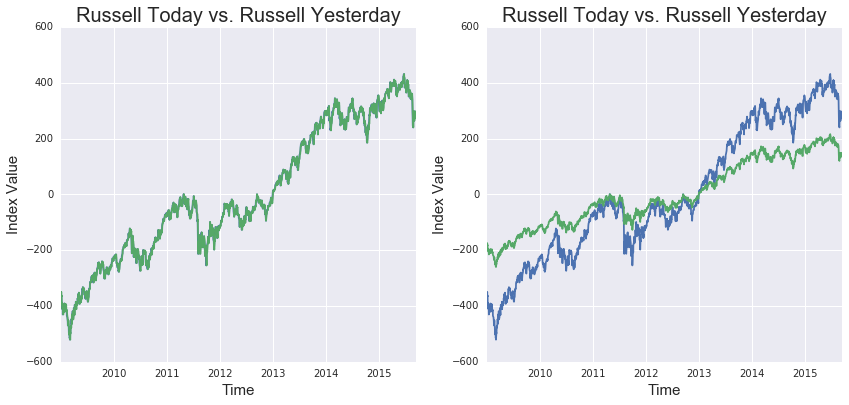

In [216]:
fig, ax = plt.subplots(figsize=(14,6))

plt.subplot(121)
plt.plot(rus.Date, rus.yest)
plt.plot(rus.Date, rus.today)
plt.title('Russell Today vs. Russell Yesterday', fontsize = 20)
plt.ylabel('Index Value', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

plt.subplot(122)
plt.plot(rus.Date, rus.yest)
plt.plot(rus.Date, rus.half_yest)
plt.title('Russell Today vs. Russell Yesterday', fontsize = 20)
plt.ylabel('Index Value', fontsize = 15)
plt.xlabel('Time', fontsize = 15)


# plt.subplot(122)
# plt.plot(rus.Date, rus.today)

## Question 1, Part B

The graphs indicate that Yesterday's Russell Index value is a more reliable predictor of using half of Yesterday's Russell Index Value'



## Question 1, Part C

In [217]:
# create error columns
rus['err_today'] = rus.Russell - rus.today
rus['err_yest'] = rus.today - rus.yest
rus['err_half'] = rus.today - rus.half_yest

# then calculate the mean squared error for each
print ('Today Squared Error is:',rus['err_today'].mean()**2)
print ('Yesterday Squared Error is:',rus['err_yest'].mean()**2)
print ('Half Squared Error is:',rus['err_half'].mean()**2)

('Today Squared Error is:', 746570.56804838451)
('Yesterday Squared Error is:', 0.14988026845076122)
('Half Squared Error is:', 0.078842392202366565)


Calculating the mean squared error for both Yesterday and 0.5 * Yesterday shows that 0.5 * Yesterday has an error rate closer to zero. Assuming that the question's definition of "better" means an error rate closer to zero, we would say that this is the better option. However, this calculation is flawed because it is based on data that had half the error of the original dataset from the onset. Consequently, if we are defining "better" as being closer to the actual error seen in the data, Yesterday's mean squared error of around 0.15 is the more accurate measure.

## Question 2, Part A

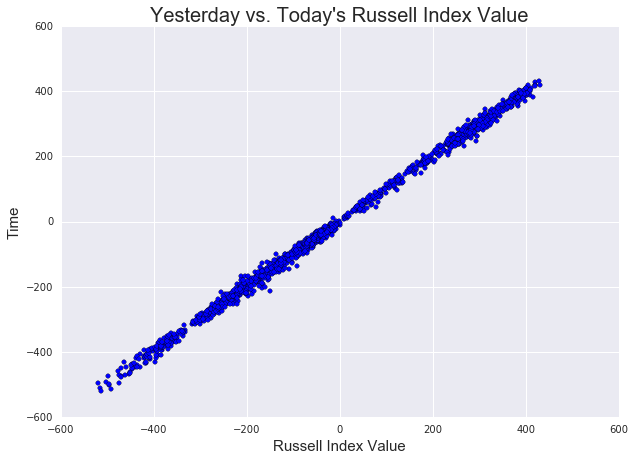

In [218]:
# plot yesterday's vs today's russell index
fig, ax = plt.subplots(figsize = (10,7))
plt.scatter(rus.today, rus.yest)
plt.title("Yesterday vs. Today's Russell Index Value", fontsize = 20)
plt.xlabel('Russell Index Value', fontsize = 15)
plt.ylabel('Time', fontsize = 15)

The pattern is clearly linear. In nearly all cases, the price of yesterday's index value is a good predictor of today's.

## Question 2, Part B

In [219]:
mod = smf.ols('today ~ yest', data = rus).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                  today   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.566e+05
Date:                Mon, 22 Feb 2016   Prob (F-statistic):               0.00
Time:                        17:43:27   Log-Likelihood:                -6465.5
No. Observations:                1684   AIC:                         1.293e+04
Df Residuals:                    1682   BIC:                         1.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3870      0.274     -1.411      0.1

Although we see a strong linear relationship between yesterday's and today's index values, the model does not include the $/epsilon/$ 'shock' value that measures the amount of unknown variance in the model. By omitting that variable, we know that we are not fully accounting for the total variance

The high R^2 value of 0.998 and coefficient of 0.9991 

it is not noise. the fundamentals that impact the russell 2000 
buried within our error term are factors that impact the russell index value
consequently, we know that the model does not fully capture the relationship between today and yesterday



## Question 2, Part C

The regression model returns a slope of 0.9991 and an intercept value of -0.387. I would not consider the slope value particularly different from 1, and the intercept value tells us that, when t = 0, the model was around 39% below the mean.

## Question 2, Part D

Given the high R^2 and slope values we find in the regression model between today's and yesterday's index values, we see that yesterday's index value is a very good predictor of today's index value. Since random walks are best predicted with lag = 1, and this model is best predcited with lag = 1, we can resonably infer that the Russell Index is, in fact, a random walk. 

## Question 2, Part E

In [220]:
# compute correlation between today and yesterday
np.corrcoef(rus.yest, rus.today)

array([[ nan,  nan],
       [ nan,   1.]])

The correlation between today and yesterday is 1

In [221]:
math.sqrt(0.998)

0.9989994994993742

## Question 3, Part A

In [222]:
# create lag of Russell
rus['lag_rus'] = rus['Russell'].shift(periods = -1)
rus.head()
# then plot the russell returns
rus['returns'] = (rus['Russell'] - rus['lag_rus']) / rus['lag_rus']
rus.head()

,Date,Russell,today,yest,change,half_yest,err_today,err_yest,err_half,lag_rus,returns
0,2009-01-02,505.839996,-358.203156,-359.013153,0.809997,-179.506576,864.043152,0.809997,-178.696579,505.029999,0.001604
1,2009-01-05,505.029999,-359.013153,-349.333130,-9.680023,-174.666565,864.043152,-9.680023,-184.346588,514.710022,-0.018807
2,2009-01-06,514.710022,-349.333130,-366.943146,17.610016,-183.471573,864.043152,17.610016,-165.861557,497.100006,0.035425
3,2009-01-07,497.100006,-366.943146,-362.033142,-4.910004,-181.016571,864.043152,-4.910004,-185.926575,502.010010,-0.009781
4,2009-01-08,502.010010,-362.033142,-382.743164,20.710022,-191.371582,864.043152,20.710022,-170.661560,481.299988,0.043029


In [223]:
# compute sample average and standard devation of the returns
print 'The sample average is:', rus['returns'].mean()
print 'The sample standard deviation is:', rus['returns'].std()

The sample average is: -0.000373474253392
The sample standard deviation is: 0.0153895449678


In [224]:
import scipy
from scipy import stats

returns = np.asarray(rus['returns'])

scipy.stats.ttest_1samp(returns, 0)

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [225]:
#(sm - m) / np.sqrt(sv/float(n))

In [226]:
t_test = (0 - rus['returns'].mean()) / (math.sqrt(rus['returns'].var()/len(rus['returns'])))
t_test

0.99617317163063157

The T-Test would help us determine whether the mean returns results significantly different from zero. Returning a value less than 0.05 would tell us that they are, in fact, significantly different. However, our T-Test returns a p-value of very nearly -1, which means that we fail to reject that the mean returns are zero.

## Question 3, Part B

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


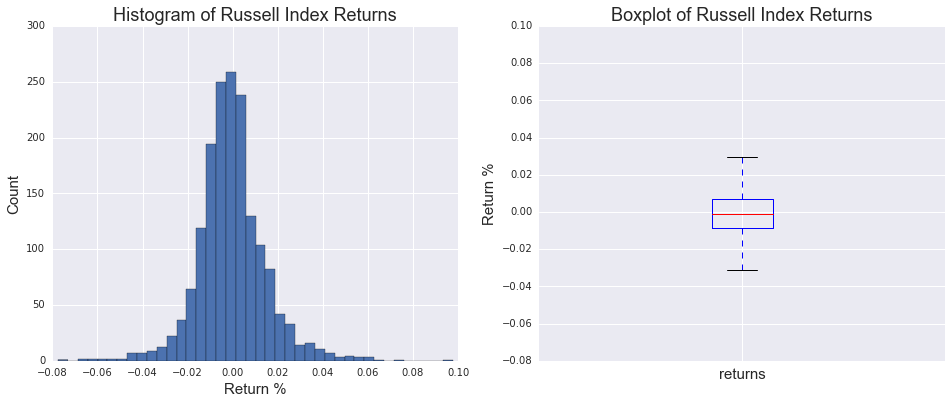

In [231]:
fig, ax = plt.subplots(figsize = (16,6))

plt.subplot(121)
rus.returns.hist(bins = 40)
plt.title('Histogram of Russell Index Returns', fontsize = 18)
plt.xlabel('Return %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(122)
rus.boxplot(column = 'returns', fontsize = 15)
plt.title('Boxplot of Russell Index Returns', fontsize = 18)
plt.ylabel('Return %', fontsize = 15)

In [235]:
# create dataframe of just returns
returns = rus['returns']
returns.dropna(inplace = True) # then drop nan values
type(returns)

pandas.core.series.Series

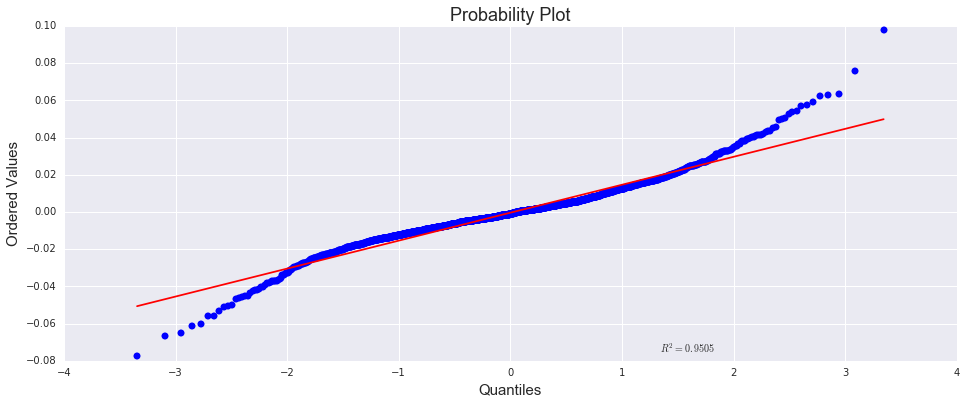

In [238]:
# plot probability plot
from scipy import stats

#data = np.random.randint(1,100,1000)

fig, ax = plt.subplots(figsize = (16,6))
scipy.stats.probplot(returns, plot = plt, fit = True);
plt.title('Probability Plot', fontsize = 18)
plt.ylabel('Ordered Values', fontsize = 15)
plt.xlabel('Quantiles', fontsize = 15)


The Russell 2000 Index Returns are normally distributed at the center of the distribution, but the distribution begins to break down around the tails as we move further away from the mean.

## Question 3, Part C

In [239]:
# Plot today’s returns versus yesterday’s returns. Does this plot appear very different 
# from the one in 2A)? Which seems to be easier to predict: Today’s Russell, or Today’s returns?

# first plot returns
rus.rename(columns = {'returns':'today_returns'}, inplace = True)
rus['ruslaglag'] = rus['lag_rus'].shift(periods = -1)
rus['yest_returns'] = (rus['Russell'] - rus['ruslaglag'])/rus['ruslaglag']
rus.head()

,Date,Russell,today,yest,change,half_yest,err_today,err_yest,err_half,lag_rus,today_returns,ruslaglag,yest_returns
0,2009-01-02,505.839996,-358.203156,-359.013153,0.809997,-179.506576,864.043152,0.809997,-178.696579,505.029999,0.001604,514.710022,-0.017233
1,2009-01-05,505.029999,-359.013153,-349.333130,-9.680023,-174.666565,864.043152,-9.680023,-184.346588,514.710022,-0.018807,497.100006,0.015953
2,2009-01-06,514.710022,-349.333130,-366.943146,17.610016,-183.471573,864.043152,17.610016,-165.861557,497.100006,0.035425,502.010010,0.025298
3,2009-01-07,497.100006,-366.943146,-362.033142,-4.910004,-181.016571,864.043152,-4.910004,-185.926575,502.010010,-0.009781,481.299988,0.032828
4,2009-01-08,502.010010,-362.033142,-382.743164,20.710022,-191.371582,864.043152,20.710022,-170.661560,481.299988,0.043029,468.799988,0.070840


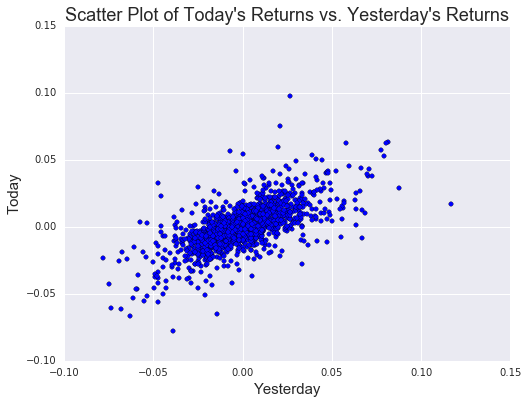

In [241]:
fig, ax = plt.subplots(figsize = (8,6))

plt.scatter(rus.yest_returns, rus.today_returns)
plt.title("Scatter Plot of Today's Returns vs. Yesterday's Returns", fontsize = 18)
plt.xlabel('Yesterday', fontsize = 15)
plt.ylabel('Today', fontsize = 15)

## Question 3, Part D

In [242]:
mod = smf.ols('today_returns ~ yest_returns', data = rus).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:          today_returns   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 22 Feb 2016   Prob (F-statistic):          4.53e-220
Time:                        17:47:38   Log-Likelihood:                 5139.0
No. Observations:                1683   AIC:                        -1.027e+04
Df Residuals:                    1681   BIC:                        -1.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.133e-05      0.000      0.041   

The coefficient of 0.4979 tells us that for each point that the yesterday's return increases, we can expect to see today's returns increase by about half of a point. The coefficients are significantly different from zero, as determined by our p-value of 0.000 listed on the regression table.

## Question 4